<a href="https://colab.research.google.com/github/RiccoFlores/100-Days-Of-ML-Code/blob/master/NB2_Data_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fase 2: Data Understanding (CRISP-DM)

Después de definir el problema de negocio, la segunda fase del modelo CRISP-DM es
**Data Understanding**.

En esta fase buscamos:
- Familiarizarnos con los datos
- Evaluar su calidad
- Detectar patrones iniciales
- Identificar problemas potenciales antes de modelar

Trabajaremos con un dataset público incluido en la bibliotecas `seaborn`.

## Tareas CRISP-DM cubiertas en esta notebook

1. Recolección inicial de datos  
2. Descripción de los datos  
3. Exploración de los datos  
4. Verificación de la calidad de los datos  


## Preparación del entorno

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style="whitegrid")

## Tarea 1: Recolección Inicial de Datos

### 1.1 Dataset: Titanic (seaborn)

Información de pasajeros del Titanic.

Este dataset es ampliamente utilizado para análisis exploratorio y contiene variables demográficas y socioeconómicas.

In [3]:
df_titanic = sns.load_dataset("titanic")

In [4]:
#df_titanic.head()
df_titanic.tail(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


## Tarea 2: Descripción de los Datos
### 2.1 Dimensiones y estructura

In [5]:
df_titanic.shape#[1]

(891, 15)

In [6]:
df_titanic.columns#[-1]

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 2.2 Describir variables numéricas
Estadística descriptiva

In [8]:
df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2.3 Describir variables categóricas
Uso del `df.value_counts()`

In [9]:
df_titanic[['sex','who','adult_male']].value_counts().reset_index()
#df_titanic[['embarked','embark_town']].value_counts().reset_index()

,sex,who,adult_male,count
0,male,man,True,537
1,female,woman,False,271
2,female,child,False,43
3,male,child,False,40


## Tarea 3: Exploración de los Datos (EDA Inicial)
### 3.1 Distribuciones univariadas
Edad

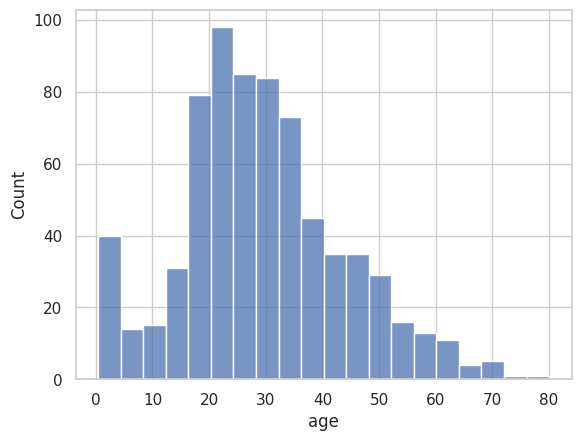

In [10]:
sns.histplot(df_titanic["age"])#, bins=20)
#plt.title("Distribución de Edad")
plt.show()

### 3.2 Análisis bivariado
Supervivencia por sexo

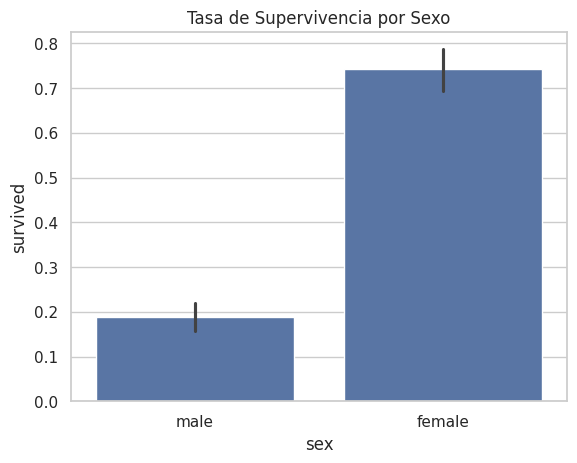

In [11]:
sns.barplot(data=df_titanic, x="sex", y="survived")
plt.title("Tasa de Supervivencia por Sexo")
plt.show()

¿Se observan tendencias claras?

¿Variables potencialmente importantes?

### 3.3 Segmentación simple

In [12]:
df_titanic.groupby("class",observed=True)["survived"].mean()

,survived
class,
First,0.629630
Second,0.472826
Third,0.242363


In [13]:
df_titanic[["who", "sex","class", "survived"]].value_counts()

who    sex     class   survived
man    male    Third   0           281
               Second  0            91
woman  female  First   1            89
man    male    First   0            77
woman  female  Second  1            60
               Third   0            58
                       1            56
man    male    First   1            42
               Third   1            38
child  male    Third   0            19
       female  Third   1            16
                       0            14
               Second  1            10
       male    Third   1             9
               Second  1             9
man    male    Second  1             8
woman  female  Second  0             6
child  male    First   1             3
       female  First   1             2
woman  female  First   0             2
child  female  First   0             1
Name: count, dtype: int64

In [14]:
df_titanic.groupby(["who", "sex","class"],observed=True)["survived"].mean()

who    sex     class 
child  female  First     0.666667
               Second    1.000000
               Third     0.533333
       male    First     1.000000
               Second    1.000000
               Third     0.321429
man    male    First     0.352941
               Second    0.080808
               Third     0.119122
woman  female  First     0.978022
               Second    0.909091
               Third     0.491228
Name: survived, dtype: float64

## Tarea 4: Verificación de la Calidad de los Datos
### 4.1 Valores faltantes

In [15]:
df_titanic.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df_titanic.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [17]:
df_titanic.isna().mean().sort_values(ascending=False)

,0
deck,0.772166
age,0.198653
embarked,0.002245
embark_town,0.002245
sex,0.000000
pclass,0.000000
survived,0.000000
fare,0.000000
parch,0.000000
sibsp,0.000000


### 4.2 Visualización de valores faltantes

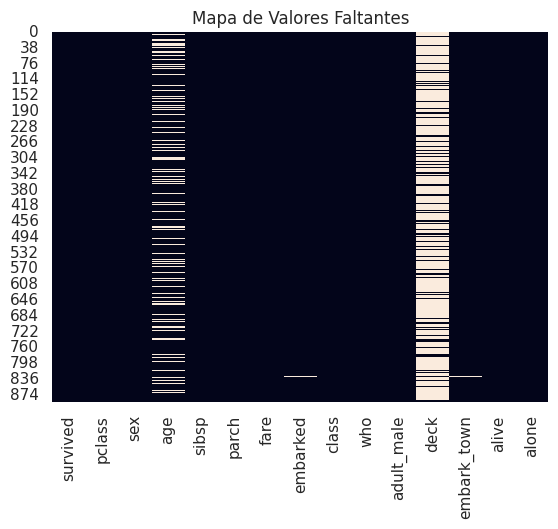

In [18]:
sns.heatmap(df_titanic.isna(), cbar=False)
plt.title("Mapa de Valores Faltantes")
plt.show()

### 4.3 Detección inicial de outliers

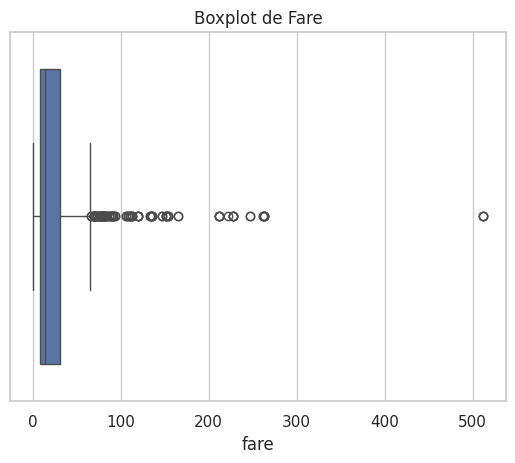

In [19]:
sns.boxplot(x=df_titanic["fare"])
plt.title("Boxplot de Fare")
plt.show()

¿Estos valores extremos son errores o casos válidos?

### 4.4 Consistencia y sentido de negocio

In [20]:
df_titanic["fare"].describe()

,fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [21]:
df_titanic[df_titanic["fare"] == 0].tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
674,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
732,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
806,0,1,male,39.0,0,0,0.0,S,First,man,True,A,Southampton,no,True
815,0,1,male,NaN,0,0,0.0,S,First,man,True,B,Southampton,no,True
822,0,1,male,38.0,0,0,0.0,S,First,man,True,NaN,Southampton,no,True


¿Tiene sentido un boleto con costo 0?

¿Cómo lo trataríamos más adelante?

## Síntesis de la Fase Data Understanding

### Hallazgos principales
- Variables con valores faltantes importantes
- Relación clara entre sexo, clase y supervivencia
- Posibles outliers en tarifa

## Conexión con la siguiente fase (Data Preparation)

### Próximos pasos (CRISP-DM)

En la fase de **Data Preparation** será necesario:
- Tratar valores faltantes
- Crear variables nuevas
- Codificar variables categóricas
- Manejar outliers

## Ejercicio

1. Identifica 3 problemas de calidad en el dataset Titanic.
2. Propón cómo los resolverías (conceptualmente, no es necesario proporcionar código en esta fase).
3. Define 2 hipótesis que podrían evaluarse más adelante.
4. Identifica qué variables NO usarías y por qué.